<a href="https://colab.research.google.com/github/aiswaryapaul/LDA-handson/blob/main/LDA_Handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
  **Hey everyone !**

  **In a nutshell, LDA is a cool technique used to categorize data into different groups. It's like being a super organizer, looking for patterns in information to effectively sort things out.  Think of it like separating apples from oranges based on their size and color. LDA does something similar, but with much more complex data and multiple features!**

  **We'll be diving deeper into LDA throughout the seminar, so come prepared to unlock the mysteries of data classification!**

<hr>

# **Importing Libraries**

**Classical Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**SKLearn**

In [ ]:
from sklearn.metrics import *
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<hr>

# **Data Loading**

**You can grab the data directly from load_digits(), as the data you are having is in form of dictionary**

In [ ]:
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

<hr>

**Let's create a dataframe**

In [ ]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
print(df.to_string())

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  pixel_1_2  pixel_1_3  pixel_1_4  pixel_1_5  pixel_1_6  pixel_1_7  pixel_2_0  pixel_2_1  pixel_2_2  pixel_2_3  pixel_2_4  pixel_2_5  pixel_2_6  pixel_2_7  pixel_3_0  pixel_3_1  pixel_3_2  pixel_3_3  pixel_3_4  pixel_3_5  pixel_3_6  pixel_3_7  pixel_4_0  pixel_4_1  pixel_4_2  pixel_4_3  pixel_4_4  pixel_4_5  pixel_4_6  pixel_4_7  pixel_5_0  pixel_5_1  pixel_5_2  pixel_5_3  pixel_5_4  pixel_5_5  pixel_5_6  pixel_5_7  pixel_6_0  pixel_6_1  pixel_6_2  pixel_6_3  pixel_6_4  pixel_6_5  pixel_6_6  pixel_6_7  pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  pixel_7_7
0           0.0        0.0        5.0       13.0        9.0        1.0        0.0        0.0        0.0        0.0       13.0       15.0       10.0       15.0        5.0        0.0        0.0        3.0       15.0        2.0        0.0       11.0        8.0        0.0        0.0        4.0 

In [ ]:
df["Target"] = digits.target

In [ ]:
df["Target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 640x480 with 0 Axes>

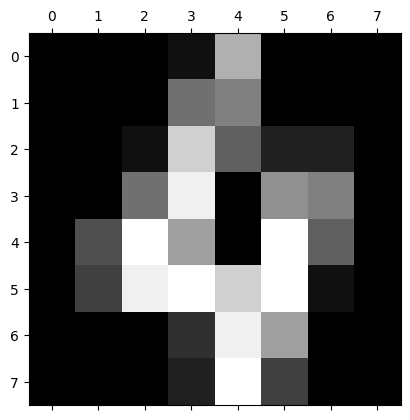

In [ ]:
plt.gray()
plt.matshow(digits.data[4].reshape(8, 8))
plt.show()

In [ ]:
#split the data
x = digits.data
y =digits.target

In [ ]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
#independent columns

x_Df = df.drop("Target", axis =1)
y_Df = df["Target"]

In [ ]:
x_Df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
y_Df

,Target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20,random_state=42)

In [ ]:
#standardize the data
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

<hr>

#**Linear Discriminant Analysis**

  **Inorder to find the number of components required for LDA, we can use a simple formula that is `n-1`**

  **Just assume there are n persons, so how many lines we would need to distinguish between the given n persons**

  **If incase, you are having less number of features as compared to your classes, you need to use `min(no of features, no_of_classes - 1)`**

**In this data, we are having 64 features, and number of classes are 10**
  * **So, in this case we would use (n-1) = 9**

In [ ]:
x.shape

(1797, 64)

In [ ]:
#min(64,10-1)
min(64,9)

9

In [ ]:
64-9

55

In [ ]:
LDA = LinearDiscriminantAnalysis(n_components= 9)

In [ ]:
x_train = LDA.fit_transform(x_train,y_train)

In [ ]:
x_test = LDA.transform(x_test)

In [ ]:
x_train.shape

(1437, 9)

In [ ]:
#MODEL BUILDING
model = RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9527777777777777

In [ ]:
#plotly

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x = x_train[:,0], y = y_train, z = x_train[:,1],
                    labels={
                        "x": "LD1",
                        "y": "LD2",
                        "z": "LD3"
                    },
                    opacity=1, color = y_train)

fig.update_layout(scene=dict(xaxis_backgroundcolor="white",
                             yaxis_backgroundcolor="white",
                             zaxis_backgroundcolor="white"))

fig.update_layout(scene=dict(xaxis_showgrid=True, xaxis_gridwidth=1, xaxis_gridcolor='lightgrey',
                             xaxis_zeroline=True, xaxis_zerolinewidth=1, xaxis_zerolinecolor='lightgrey',
                             xaxis_showline=True, xaxis_linewidth=1, xaxis_linecolor='black',
                             yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='lightgrey',
                             yaxis_zeroline=True, yaxis_zerolinewidth=1, yaxis_zerolinecolor='lightgrey',
                             yaxis_showline=True, yaxis_linewidth=1, yaxis_linecolor='black',
                             zaxis_showgrid=True, zaxis_gridwidth=1, zaxis_gridcolor='lightgrey',
                             zaxis_zeroline=True, zaxis_zerolinewidth=1, zaxis_zerolinecolor='lightgrey',
                             zaxis_showline=True, zaxis_linewidth=1, zaxis_linecolor='black'))

fig.update_layout(title_text="3D LDA Scatter Plot")

fig.update_traces(marker=dict(size=3))

fig.show()
